In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs 
from netCDF4 import Dataset

In [250]:
exp_name = input('Which experiment would you like to investigate ?')

Which experiment would you like to investigate ? northland_same_albedo_different_roughness


In [251]:
nc = Dataset('/scratch/mp586/Isca_DATA/ISCA_HPC/monthlyclimo_'+exp_name+'.nc')
time = [np.array(np.linspace(0,11,12,dtype = 'datetime64[M]'))]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
P_clim = xr.DataArray(nc.variables['precipitation'], coords = [time[0], lat, lon], dims = ['time','lat','lon'])*86400
P_seasonal = P_clim.groupby('time.season').mean('time')

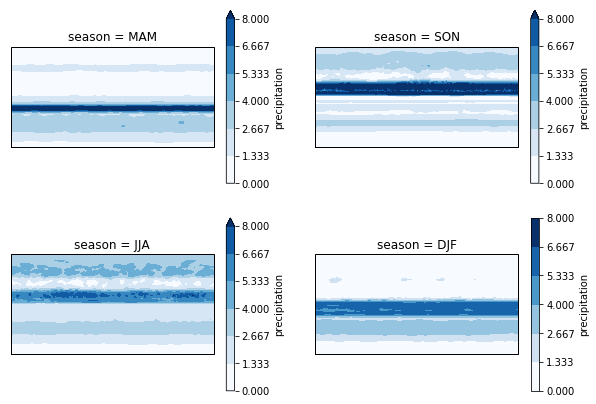

In [252]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(2, 2, 1, projection = ccrs.Mollweide())
v = np.linspace(0.,8.,11)
P_seasonal.sel(season = 'MAM').plot.contourf(ax = ax, cmap = 'Blues', vmin = 0., vmax = 8.)
ax2 = fig.add_subplot(2,2,2, projection = ccrs.Mollweide())
P_seasonal.sel(season = 'SON').plot.contourf(ax = ax2, cmap = 'Blues', vmin = 0., vmax = 8.)

ax3 = fig.add_subplot(2,2,3, projection = ccrs.Mollweide())
P_seasonal.sel(season = 'JJA').plot.contourf(ax = ax3, cmap = 'Blues', vmin = 0., vmax = 8.)

ax4 = fig.add_subplot(2,2,4, projection = ccrs.Mollweide())
P_seasonal.sel(season = 'DJF').plot.contourf(ax = ax4, cmap = 'Blues', vmin = 0., vmax = 8.)

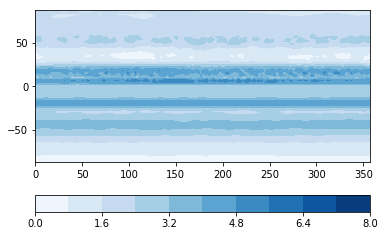

In [253]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# P_clim.mean('time').plot.contourf(ax = ax, cmap = 'Blues', vmin = 0., vmax = 8.)
cs = ax.contourf(lon, lat, P_clim.mean('time'), v, cmap = 'Blues')
cbar = fig.colorbar(cs, orientation = 'horizontal')
fig.savefig('/scratch/mp586/Code/Graphics/Isca/ISCA_HPC/'+str(exp_name)+'/P_annual.png')